In [15]:
import os # processing file path
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # data visualization
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.metrics import accuracy_score

In [2]:
def load_mnist(path, kind='train'):
    import gzip

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [3]:
# Load the data
X_train, y_train = load_mnist('/home/hoangloc/fashion-mnist/data/fashion', kind='train')
X_test, y_test = load_mnist('/home/hoangloc/fashion-mnist/data/fashion', kind='t10k')
m_train = X_train.shape[0]
m_test = X_test.shape[0]

In [4]:
print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(y_test.shape))
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))

X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)
Number of training examples: m_train = 60000
Number of testing examples: m_test = 10000


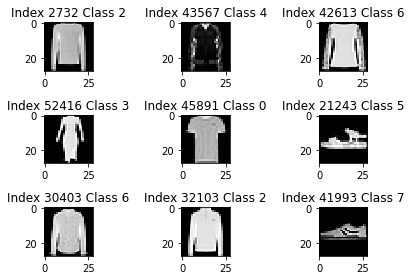

In [5]:
# random check with nine training examples
np.random.seed(0);
indices = list(np.random.randint(m_train,size=9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[indices[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Index {} Class {}".format(indices[i], y_train[indices[i]]))
    plt.tight_layout()

| 0           | 1       | 2        | 3     | 4    | 5     | 6     | 7       | 8    | 9          |
| ----------- | ------- | -------- | ----- | ---- | ----- | ----- | ------- | ---- | ---------- |
| T-shirt/top | Trouser | Pullover | Dress | Coat | Sanda | Shirt | Sneaker | Bag  | Ankle boot |


## Preprocessing

# Subsample the data

In [6]:
X_train1, X_val, Y_train1, Y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 0)
Y_train1 = np_utils.to_categorical(Y_train1, 10)
Y_val = np_utils.to_categorical(Y_val, 10)
X_train1.shape

(54000, 784)

In [7]:
print("X_train shape: " + str(X_train1.shape))
print("y_train shape: " + str(Y_train1.shape))
print("X_val shape: " + str(X_val.shape))
print("y_val shape: " + str(Y_val.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(y_test.shape))

X_train shape: (54000, 784)
y_train shape: (54000, 10)
X_val shape: (6000, 784)
y_val shape: (6000, 10)
X_test shape: (10000, 784)
y_test shape: (10000,)


In [21]:
def compute_cost(A2, Y):
    
    m = Y.shape[0] # number of example

    logprobs = np.multiply(np.log(A2),Y) + np.multiply((1-Y), np.log(1-A2))
    cost = - np.sum(logprobs)/m
    
    cost = np.squeeze(cost)     
    assert(isinstance(cost, float))
    
    return cost

In [9]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

## Implacement TwoLayerNet

In [29]:
input_size =X_train1.shape[1]
hidden_size = 100 # size of hidden layer
output_size = 10
# initialize parameters randomly
W1 = 0.01*np.random.randn(input_size, hidden_size)
b1 = np.zeros((hidden_size, 1))
W2 = 0.01*np.random.randn(hidden_size, output_size)
b2 = np.zeros((output_size, 1))
N = X_train1.shape[0]
eta = 1 # learning rate
for i in range(20):
    ## Feedforward
    Z1 = np.dot(X_train1,W1) + b1.T
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(A1,W2) + b2.T
    Yhat = softmax(Z2)
    print(Yhat[1].argmax())
    # backpropagation
    E2 = (Yhat - Y_train1 )/N
    dW2 = np.dot(A1.T,E2)
    db2 = np.sum(E2.T, axis = 1, keepdims = True)
    E1 = np.dot(E2,W2.T)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X_train1.T,E1)
    db1 = np.sum(E1.T, axis = 1, keepdims = True)
    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

5
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
